In [2]:
import pandas as pd

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00


In [4]:
test.head()

,id,anchor,target,context
0,4112d61851461f60,opc drum,inorganic photoconductor drum,G02
1,09e418c93a776564,adjust gas flow,altering gas flow,F23
2,36baf228038e314b,lower trunnion,lower locating,B60
3,1f37ead645e7f0c8,cap component,upper portion,D06
4,71a5b6ad068d531f,neural stimulation,artificial neural network,H04


In [5]:
df = pd.DataFrame(train)

In [6]:
# counting words in anchor column
wordcount_anchor = df['anchor'].str.split().str.len()
wordcount_anchor

0        1
1        1
2        1
3        1
4        1
        ..
36468    2
36469    2
36470    2
36471    2
36472    2
Name: anchor, Length: 36473, dtype: int64

In [26]:
wordcount_anchor.max()

5

In [7]:
# using the maximum number of words in 'anchor' plus one for the number of columns so each word in a row gets its own column
split_anchor = df['anchor'].str.rsplit(' ', 6, expand=True)
split_anchor

,0,1,2,3,4
0,abatement,None,None,None,None
1,abatement,None,None,None,None
2,abatement,None,None,None,None
3,abatement,None,None,None,None
4,abatement,None,None,None,None
...,...,...,...,...,...
36468,wood,article,None,None,None
36469,wood,article,None,None,None
36470,wood,article,None,None,None
36471,wood,article,None,None,None


In [8]:
# counting words in target column
wordcount_target = df['target'].str.split().str.len()
wordcount_target

0        3
1        3
2        2
3        2
4        2
        ..
36468    2
36469    2
36470    2
36471    2
36472    2
Name: target, Length: 36473, dtype: int64

In [29]:
wordcount_target.max()

15

In [9]:
# doing the same as we did for anchor
split_target = df['target'].str.rsplit(' ', 16, expand=True)
split_target

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,abatement,of,pollution,None,None,None,None,None,None,None,None,None,None,None,None
1,act,of,abating,None,None,None,None,None,None,None,None,None,None,None,None
2,active,catalyst,None,None,None,None,None,None,None,None,None,None,None,None,None
3,eliminating,process,None,None,None,None,None,None,None,None,None,None,None,None,None
4,forest,region,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36468,wooden,article,None,None,None,None,None,None,None,None,None,None,None,None,None
36469,wooden,box,None,None,None,None,None,None,None,None,None,None,None,None,None
36470,wooden,handle,None,None,None,None,None,None,None,None,None,None,None,None,None
36471,wooden,material,None,None,None,None,None,None,None,None,None,None,None,None,None


In [21]:
from collections import Counter

In [12]:
def dupe_wc(x):
    x = str(x).split()
    d = 0
    for key, val in Counter(x).items():
        d = d + (val > 1)
    return d

In [13]:
train['anchor_target'] = train['anchor'] + ' ' + train['target']

In [23]:
#Each row would represent each patent case, showing all words in anchor and target.
train['anchor_target']

0        abatement abatement of pollution
1                abatement act of abating
2               abatement active catalyst
3           abatement eliminating process
4                 abatement forest region
                       ...               
36468         wood article wooden article
36469             wood article wooden box
36470          wood article wooden handle
36471        wood article wooden material
36472       wood article wooden substrate
Name: anchor_target, Length: 36473, dtype: object

In [14]:
train['dupecount'] = train['anchor_target'].apply(dupe_wc)

In [15]:
#This shows the number of words that appear in both anchor and target
train['dupecount']

0        1
1        0
2        0
3        0
4        0
        ..
36468    1
36469    0
36470    0
36471    0
36472    0
Name: dupecount, Length: 36473, dtype: int64

In [1]:
import matplotlib.pyplot as plt

In [24]:
df1=train['dupecount']

In [25]:
#Most cases (18,246) have no exact words that appear both in anchor and target. 
#However 13,701 cases have 1 word duplicated in both anchor and target
# in 4 cases, 5 words are duplicated. Considering the max word count in anchor is 5, the sets of words would be 
# identical between anchor and target.
df1.value_counts()

0    18246
1    13701
2     4036
3      440
4       46
5        4
Name: dupecount, dtype: int64

Text(0, 0.5, 'Number of  words duplicated in both anchor and target')

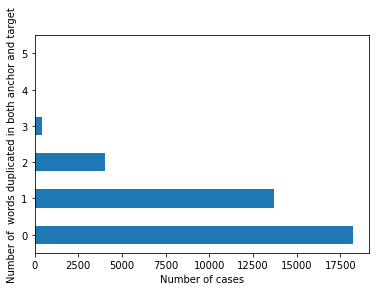

In [27]:
df1.value_counts().plot(kind= 'barh')
plt.xlabel("Number of cases")
plt.ylabel("Number of  words duplicated in both anchor and target")

In [28]:
#Now we divide the number of duplicated words by 5, which is the maximum number of words duplicated,
# to achieve the scores for each cases between 0 and 1. 
#i.e. for the 4 cases where all 5 words are duplicated, the score would be 1.
train['dupecount']/5

0        0.2
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
36468    0.2
36469    0.0
36470    0.0
36471    0.0
36472    0.0
Name: dupecount, Length: 36473, dtype: float64

Text(0, 0.5, 'Semantic Similiary Scores')

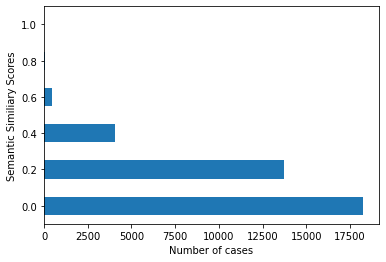

In [29]:
df2=train['dupecount']/5
df2.value_counts().plot(kind= 'barh')
plt.xlabel("Number of cases")
plt.ylabel("Semantic Similiary Scores")

In [35]:
avg = sum(df2) / len(df2)
round(avg, 4)

0.1277

In [36]:
train_avg = sum(train['score']) / len(train['score'])
round(train_avg, 4)

0.3621

In [38]:
import statistics

In [40]:
statistics.median(df2)

0.0

In [41]:
statistics.median(train['score'])

0.25

Based on the simple comparison of average and medians, we can conclude that calculating the semantic scores
using the number of exact words duplicated in anchor and target is not a good approach, since such method yields
significantly different results from actual scores given in the training data.